# Text Mining Assignment

In [1]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs

In [2]:
samsung_reviews=[]

In [4]:

for i in range (1,31):
    op=[]
    url ="https://www.amazon.in/product-reviews/B08444S68Q/ref=acr_dp_hist_5?ie=UTF8&filterByStar=five_star&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    samsung_reviews = samsung_reviews+op
op


[]

In [5]:
samsung_reviews

['\nBasically used to have Apple products . Felt that apple products were much better than other smart phones.  Also in the past I used to have Samsung S Duos and Galaxy S7. Their performance were not upto standards.  This time  for a change I thought of buying Samsung S20 Ultra. I have the cosmic grey version. Initially I was not very sure about its performance. Now I am super impressed with its performance for the following reason1. Battery life  : It almost lasts me for more than 1 day . Am a heavy user for various apps. Also the apps work seamlessly without any hassle.  The transition between the apps is also very nice2. Clear pictures3. It has a very nice sound quality .4. Becasues of the large screen size it is very easy to operate and there are lot of more features which i am super impressedI have paired by my phone with Samsung Galaxy buds+ and  Samsung S3 watch (46mm). So my workouts are getting synced without any hassle.With all this I would like to mention that I am super im

In [6]:
reviews = ' '.join(samsung_reviews)

In [7]:
###--Data - cleaning
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower() 
reviews = re.sub("[0-9" "]+"," ",reviews).lower() 
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()


In [8]:
###---Word tokenization
reviews_token = word_tokenize(reviews)

In [10]:
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]
print(reviews_without_sw)

['basically', 'apple', 'products', 'felt', 'apple', 'products', 'smart', 'phones', 'past', 'samsung', 'duos', 'galaxy', 'performance', 'upto', 'standards', 'time', 'change', 'buying', 'samsung', 'ultra', 'cosmic', 'grey', 'version', 'initially', 'performance', 'super', 'impressed', 'performance', 'reason', 'battery', 'life', 'lasts', 'day', 'heavy', 'user', 'apps', 'apps', 'work', 'seamlessly', 'hassle', 'transition', 'apps', 'nice', 'clear', 'pictures', 'nice', 'sound', 'quality', 'becasues', 'large', 'screen', 'size', 'easy', 'operate', 'lot', 'features', 'super', 'impressedi', 'paired', 'phone', 'samsung', 'galaxy', 'buds', 'samsung', 'watch', 'mm', 'workouts', 'synced', 'hassle', 'mention', 'super', 'impressed', 'phone', 'steal', 'price', 'slightly', 'higher', 'side', 'neglected', 'features', 'offers', 'ultra', 'inches', 'pure', 'smoothness', 'brilliance', 'coming', 'pro', 'upgrade', 'pro', 'sounds', 'logical', 'choice', 'wanted', 'great', 'displays', 'samsung', 'famous', 'buy', 'p

In [11]:
reviews=' '.join(reviews_without_sw)

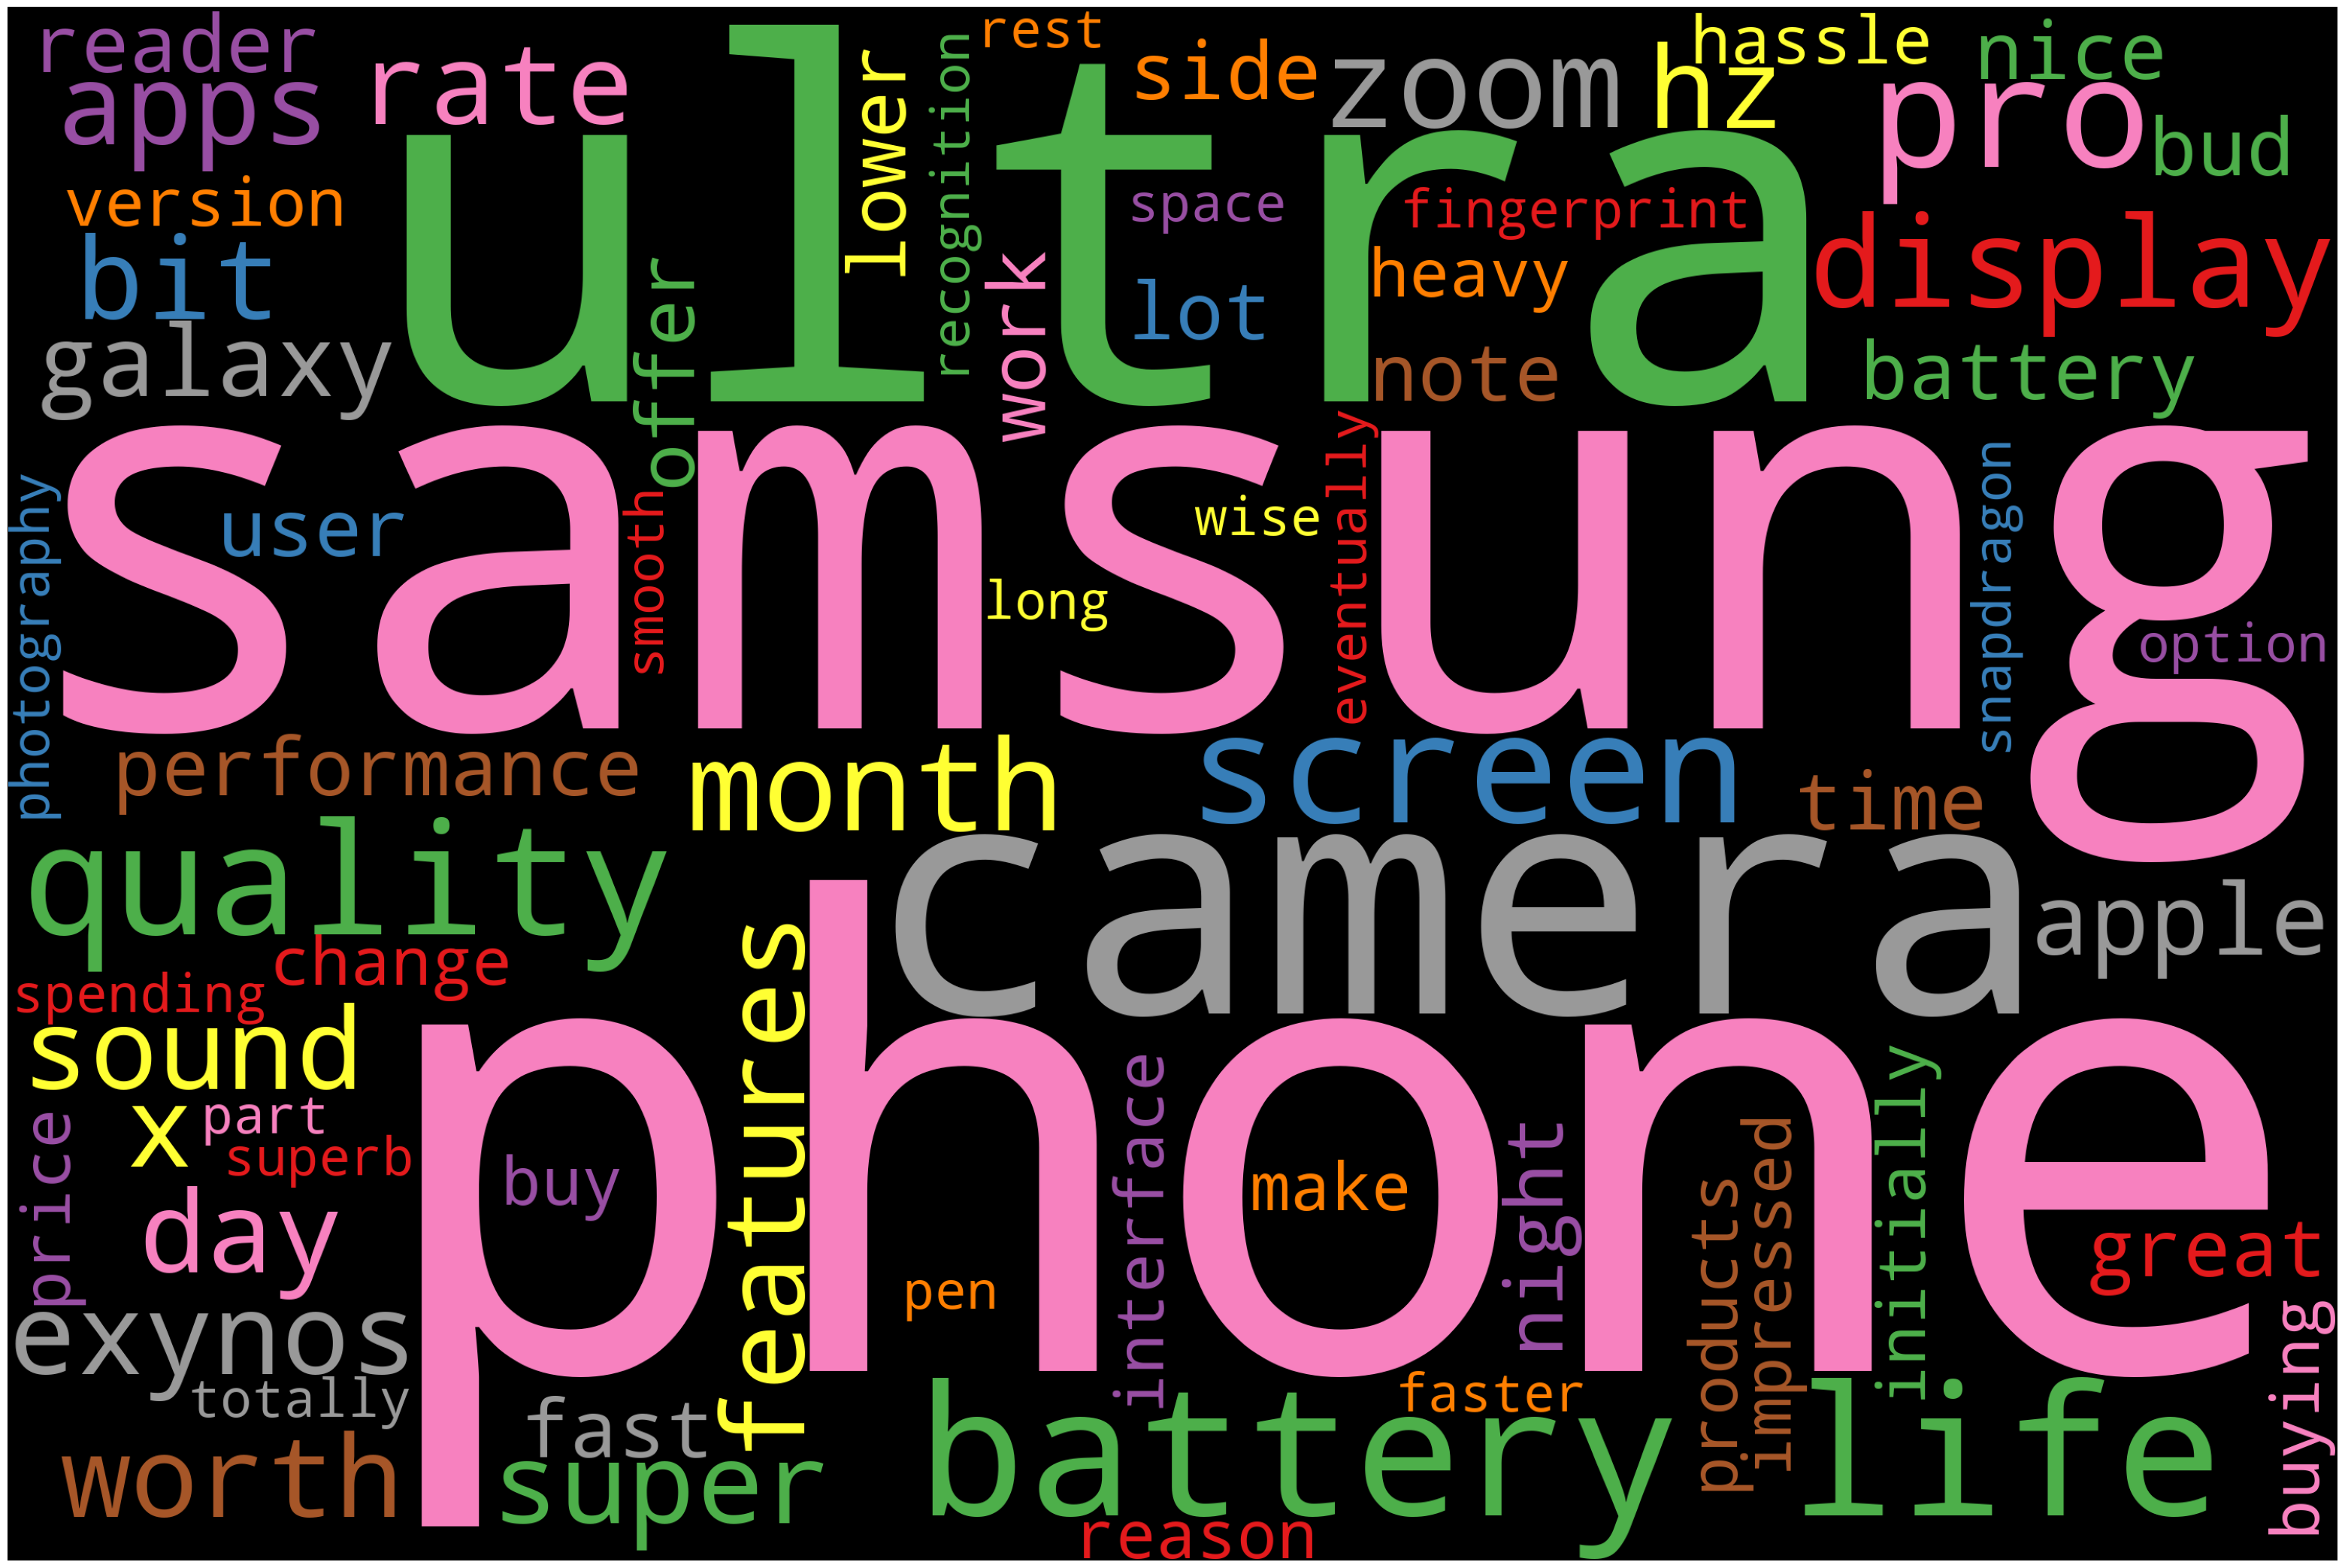

In [12]:
###---Word cloud 
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)


In [14]:
###--Emotion minig 
with open("negative-words.txt","r") as f:
    negative=f.read().split("\n")


In [15]:
negative = negative[35:]

In [16]:
reviews_neg=' '.join([word for word in reviews_without_sw if word in negative])

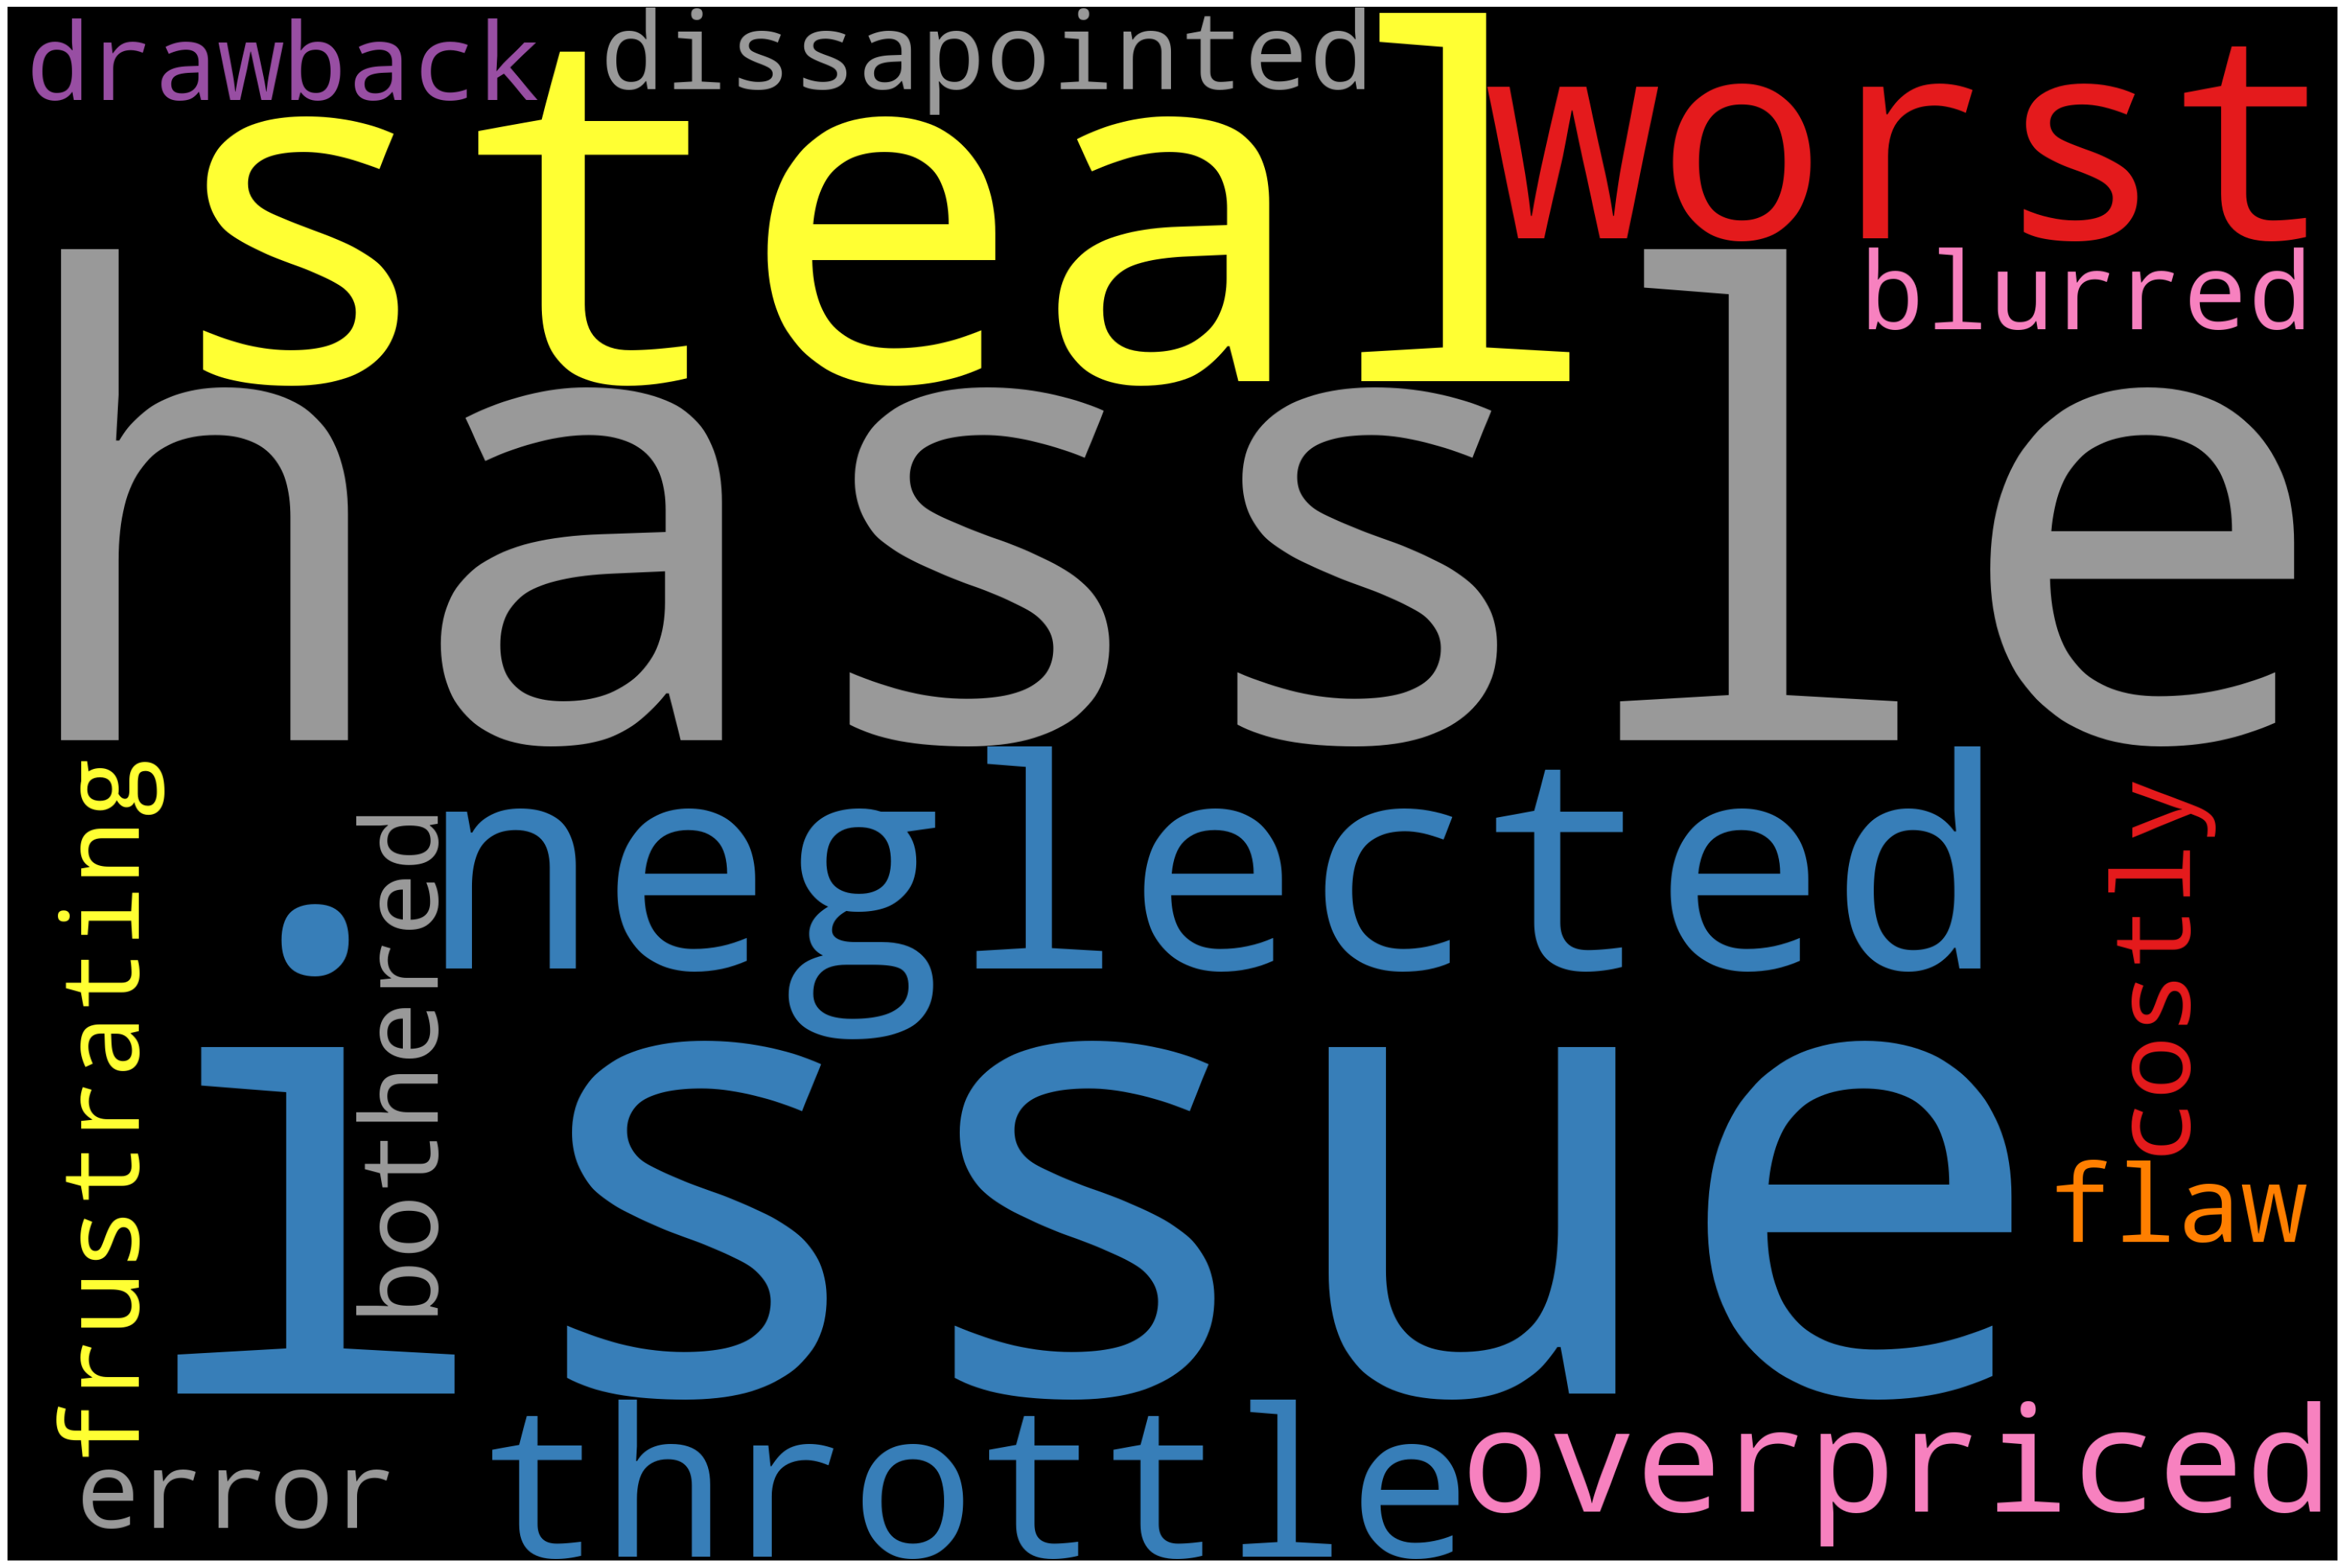

In [17]:
###---Word-cloud for negative words
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_neg)
plot_cloud(wordcloud)

In [18]:
with open("positive-words.txt","r") as f:
    positive=f.read().split("\n")


In [19]:
reviews_pos=' '.join([word for word in reviews if word in positive])
positive = positive[5:]


In [20]:
reviews_pos=' '.join([word for word in reviews_without_sw if word in positive])


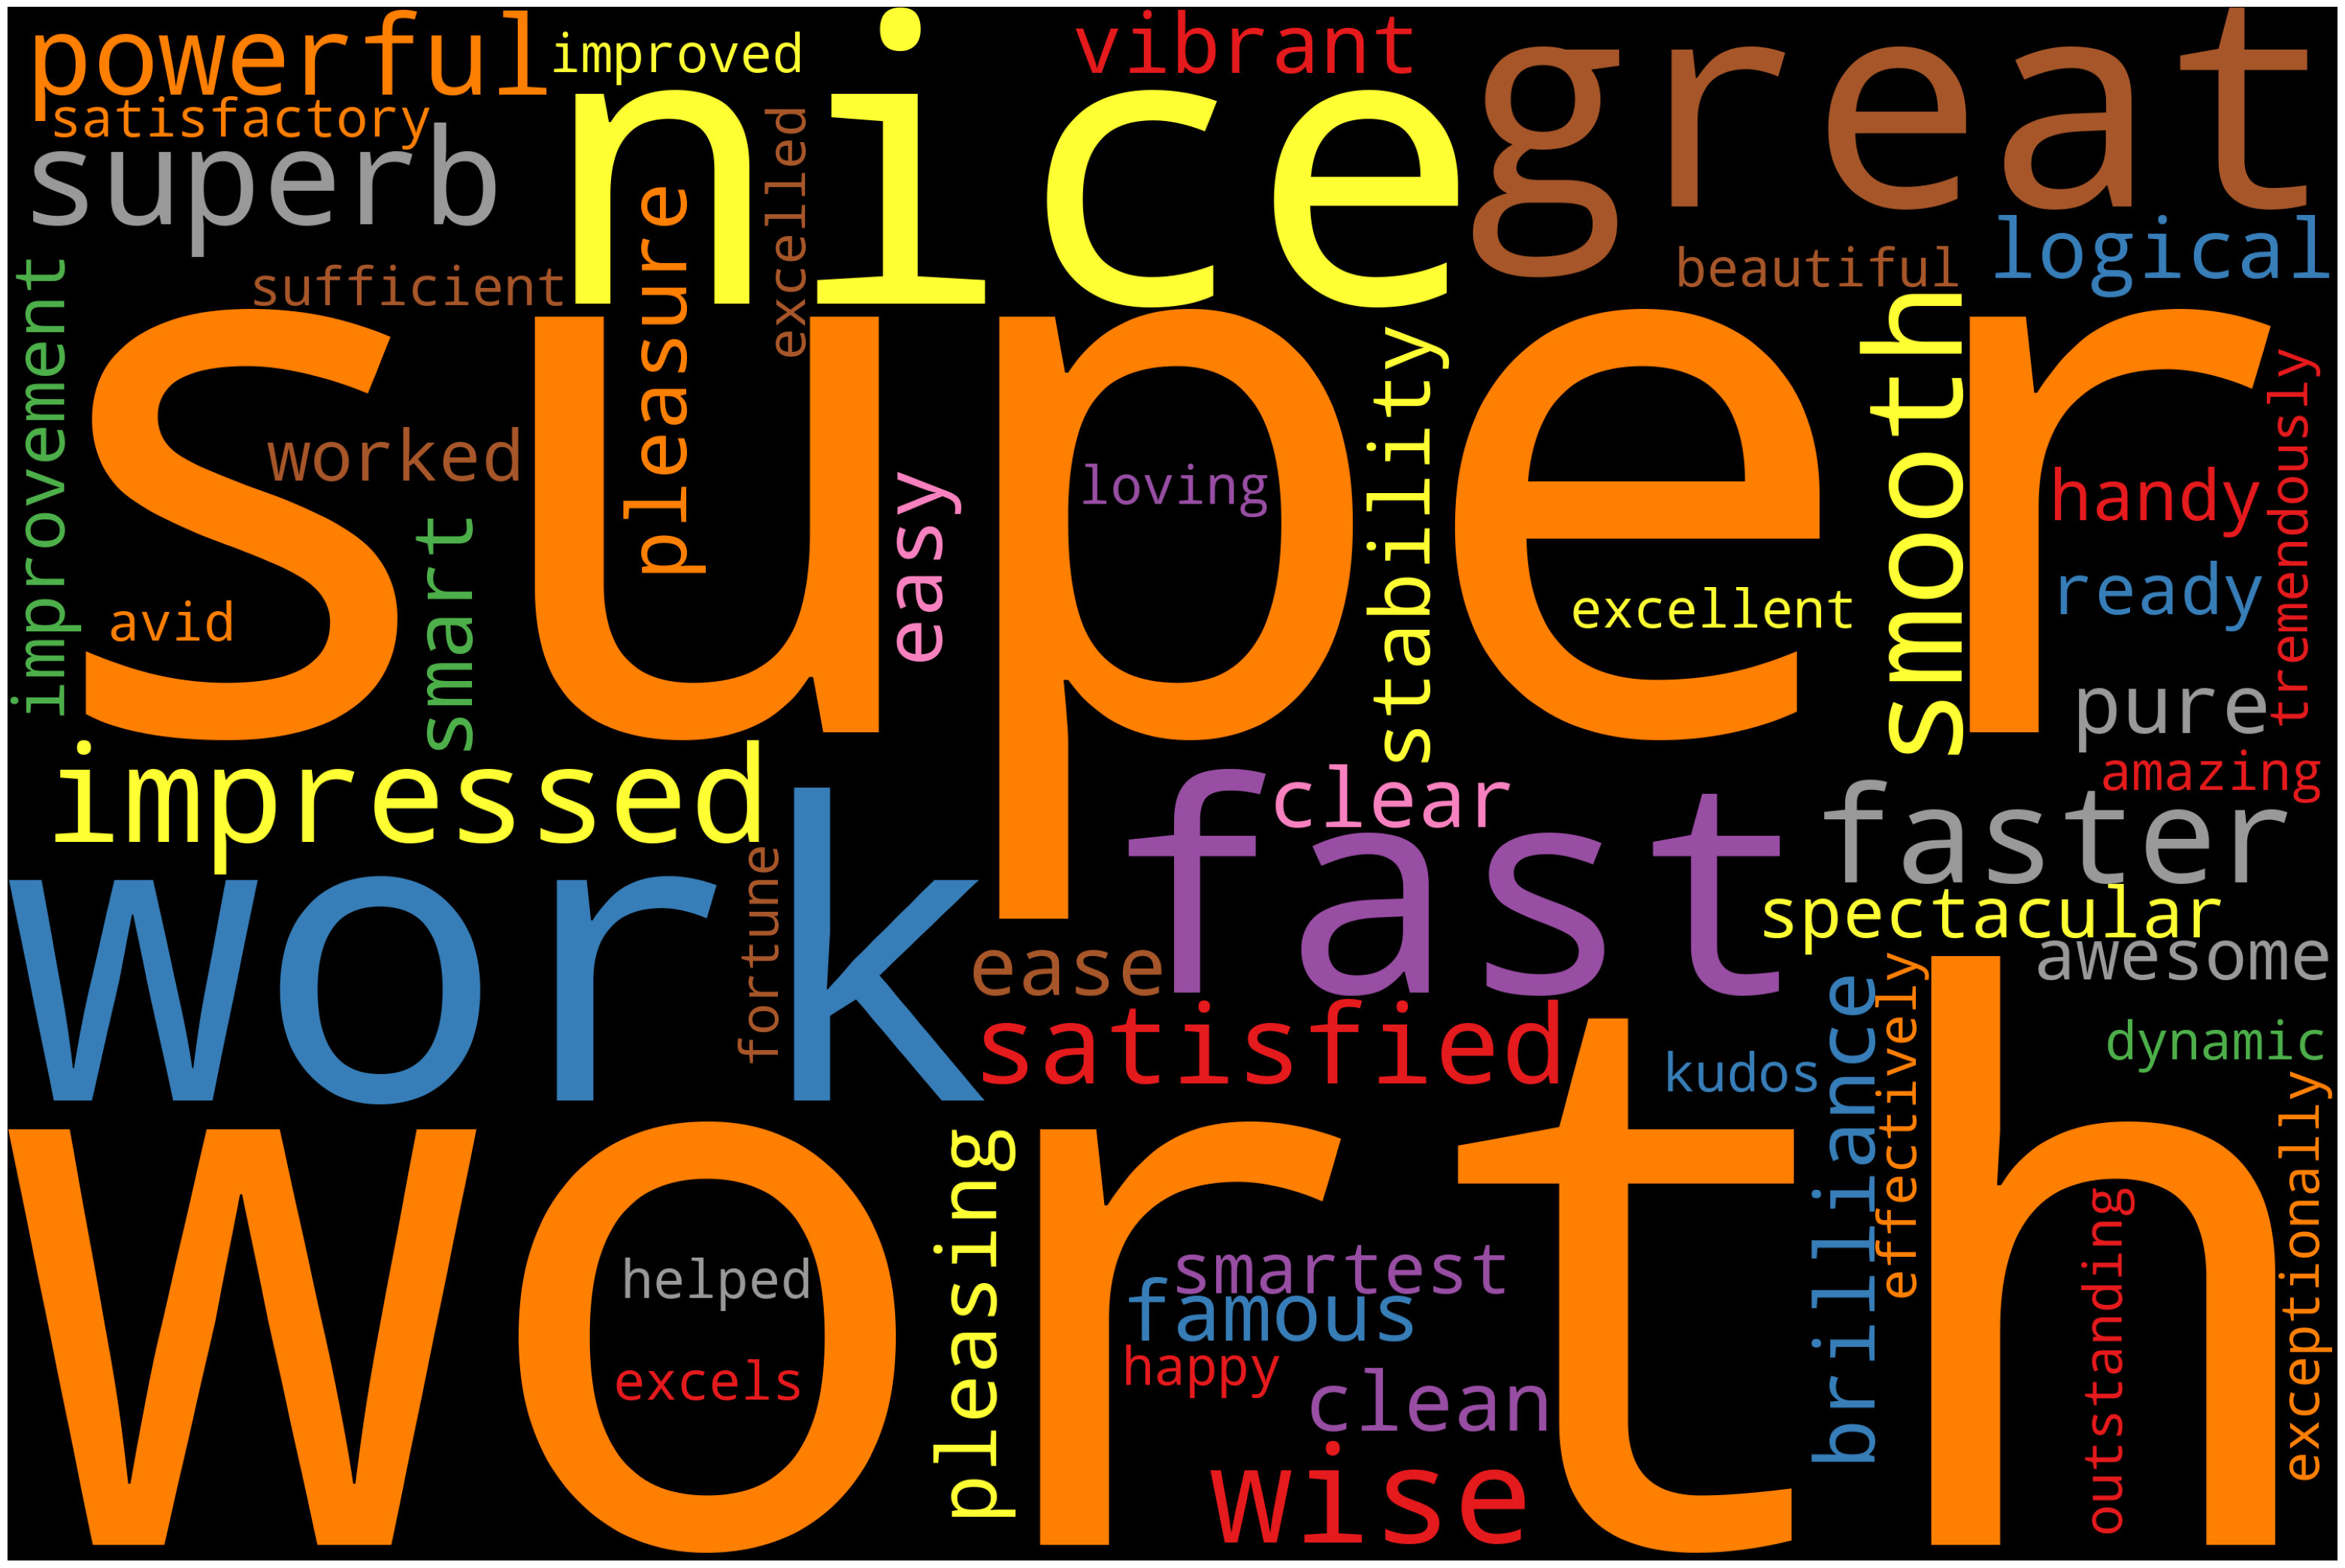

In [21]:
###---Word cloud for positive words 
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_pos)
plot_cloud(wordcloud)
